In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [297]:

#! /usr/bin/env python
# -.- encoding: utf-8 -.-

class arvbin():
    def __init__(self, Valor):
        self.Menor=None
        self.Maior=None
        self.valor=Valor

    def add(self,valor):
        if valor>self.valor:
            self.addmaior(valor)
        elif valor<self.valor:
            self.addmenor(valor)
        else:
            self.conta=self.conta+1

    def addmenor(self,valor):
        if self.Menor:
            self.Menor.add(valor)
        else:
            self.Menor=arvbin(valor)

    def addmaior(self,valor):
        if self.Maior:
            self.Maior.add(valor)
        else:
            self.Maior=arvbin(valor)


    def get(self, valor):
        """Retorna uma referência ao nó de chave 'valor'
        """
        if self.valor == valor:
            return self
        node = self.Menor if valor < self.valor else self.Maior
        if node is not None:
            return node.get(valor)

In [298]:
#poulatting the tree with arvbin objects
itens = ([x for x in range(35)])
np.random.shuffle(itens)

raiz = arvbin(itens[-1])
itens.pop()
for n in itens:
    raiz.add(n)


In [299]:
#following the simetric traverse, collecting the level of each node
def grafTree(arv, niveis, level=0):
    if arv == None : return
    grafTree(arv.Menor, niveis, level-100)
    info=(level, arv.valor)
    niveis.append(info)
    grafTree(arv.Maior, niveis,level-100)
    

In [300]:
def putX(arv, valor, x):
        """graft an attr x(x will be coordinate in the scatter plot) in node
        """
        if arv.valor == valor:
            arv.X = x
            return ((arv.valor, arv.Y)) if arv else None
        node = arv.Menor if valor < arv.valor else arv.Maior
        if node is not None:
            return putX(node,valor,x)

In [301]:
def putY(arv, level=0):
    """graft an attr y(the level being de y coordinate of scatter plot) in the node
    """
    if arv == None : return
    putY(arv.Menor, level-1)
    arv.Y=level*100
    putY(arv.Maior,level-1)

In [302]:
putY(raiz)

In [303]:
lista_niveis=[]
grafTree(raiz, lista_niveis)

In [304]:
for x in range(len(lista_niveis)):
    putX(raiz,lista_niveis[x][1],x)

In [305]:
levels=[]; valores = []
for x in lista_niveis:
    levels.append(x[0]); valores.append(x[1])

In [306]:
# Matpltlib Annotate needs xy of arrow origin and xy of arrows head
#here we will track the tree collecting xy of node and xy of your sons(if it exists), an save this coordinates in "lista_arrows"

lista_arrows=[]
def arrows(arv, lista):
    if arv == None : return
    arrows(arv.Menor, lista)
    if arv.Menor:
        arrow=(arv.X, arv.Y,arv.Menor.X, arv.Menor.Y)
        lista.append(arrow)
    if arv.Maior:
        arrow=(arv.X, arv.Y,arv.Maior.X, arv.Maior.Y)
        lista.append(arrow)
    arrows(arv.Maior, lista)


In [307]:
arrows(raiz, lista_arrows)

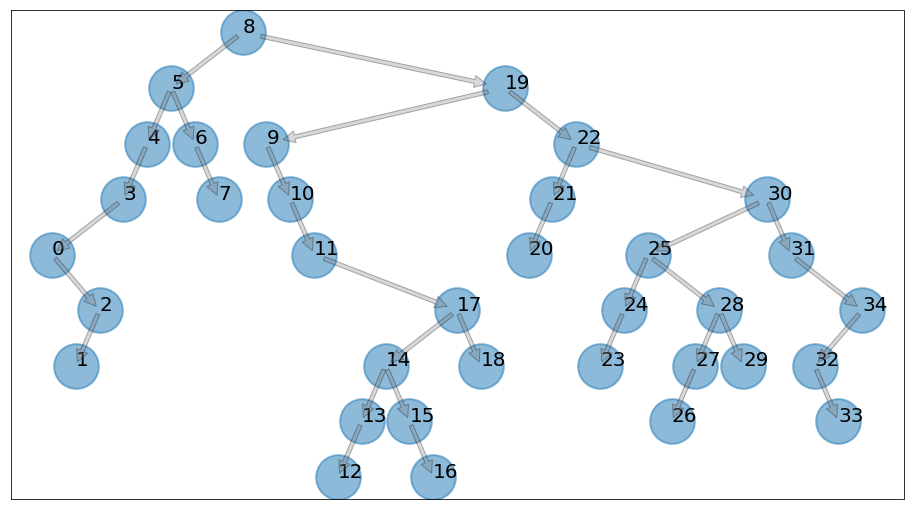

In [308]:
%config InlineBackend.rc={'figure.figsize': (16, 9)}
%matplotlib inline

#Plotting dot refering to each node in the tree
w = range(len(lista_niveis))
l = levels
plt.scatter(w, l, lw=2, alpha = 0.5, s=2000)

#printting the values
for val in range(len(valores)):
    plt.text(x = val,
             y = levels[val],
             s = str(valores[val]),
             fontsize=20)

#plotting The arrows with informations generated cells above
for arrow in lista_arrows:
    plt.annotate(u"",
                 xy=(arrow[2], arrow[3]),
                 xytext=(arrow[0], arrow[1]),
                 arrowprops=dict(facecolor ="grey",shrink=0.07, alpha = 0.3)
                )
#plotting without ticks
plt.xticks([])
plt.yticks([])


plt.plot()
# enable line bellow if want to save the figure
#plt.savefig('arve.svg', format="svg")
plt.show()


#its necessary to alternate scale for size of dots, fig and texts according we 
#choose the new size of tree( number of elements)

its a interesting way to see braches degenerations (try to insert elements without shuffle.)
References:

> https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html

> https://pythonhelp.wordpress.com/2015/01/19/arvore-binaria-de-busca-em-python/

> https://medeubranco.wordpress.com/2008/07/05/brincando-de-arvore-binaria-com-python/